# <center>Psychology Prediction Social Media Addicted or Not </center>

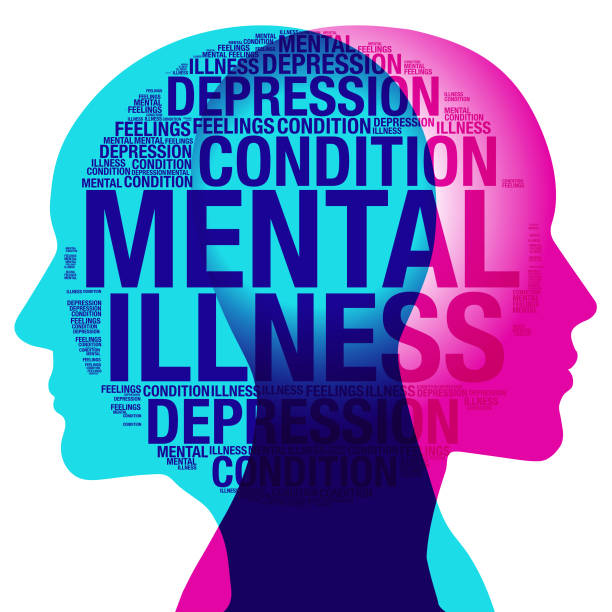

This dataset is from a 2014 survey that measures attitudes towards mental health and frequency of mental health disorders in the tech workplace. You are also encouraged to analyze data from the __[ongoing 2016 survey found here.](https://www.kaggle.com/osmi/mental-health-in-tech-2016)__

## Table of Content
1. [Import Libraries](#Import-Libraries)
1. [EDA and Graphical Representation](#EDA-and-Graphical-Representation)
1. [Model Building](#Model-Building)
1. [Feature Importance](#Feature-Importance)
1. [Save Model ](#Save-Model)
1. [Advantages](#Advantages)    
1. [Disadvantages](#Disadvantages)    
1. [Conclusion](#Conclusion)

## Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")
import numpy as np

In [2]:
# get current working directory
os.getcwd()

'C:\\Users\\Shubham\\Desktop\\AIS\\Project 3'

## EDA and Data Visualization

In [3]:
# read the dataset
dataset = pd.read_csv("dataset.csv")

In [4]:
# for head 5 obersavation
dataset.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [5]:
# Information of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [6]:
# total missing values in columns
dataset.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [7]:
# drop unnecessary columns
dataset.drop(dataset[['comments','Timestamp','state']], axis = 1, inplace=True)

In [8]:
# drop duplicates
dataset.drop_duplicates(keep = 'first')

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,male,United Kingdom,No,No,Yes,NaN,26-100,No,Yes,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,32,Male,United States,No,Yes,Yes,Often,26-100,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34,male,United States,No,Yes,Yes,Sometimes,More than 1000,No,Yes,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,46,f,United States,No,No,No,NaN,100-500,Yes,Yes,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


In [9]:
# values count in country column
dataset.Country.value_counts()

United States             751
United Kingdom            185
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Switzerland                 7
Sweden                      7
Italy                       7
Poland                      7
Belgium                     6
Brazil                      6
South Africa                6
Israel                      5
Singapore                   4
Bulgaria                    4
Mexico                      3
Finland                     3
Austria                     3
Russia                      3
Croatia                     2
Denmark                     2
Portugal                    2
Greece                      2
Colombia                    2
Philippines                 1
Hungary                     1
Spain                       1
Uruguay                     1
Romania   

In [10]:
# columns name
dataset.columns

Index(['Age', 'Gender', 'Country', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [11]:
# value count in Gender column
dataset.Gender.value_counts()

Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Woman                                               3
Male                                                3
Cis Male                                            2
Female                                              2
Female (trans)                                      2
Man                                                 2
cis male                                            1
Androgyne                                           1
Guy (-ish) ^_^                                      1
something kinda male?       

In [12]:
# create lower cases of all values in Gender column
gender = dataset['Gender'].str.lower()

In [13]:
# Select unique elements
gender = dataset['Gender'].unique()

In [14]:
# create list of male, female and trans gender
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]

trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]           

female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]


In [15]:
# to relace value with male, female and trans gender
for (row, col) in dataset.iterrows():
    if str.lower(col.Gender) in male_str:
        dataset['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)

    if str.lower(col.Gender) in female_str:
        dataset['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)

    if str.lower(col.Gender) in trans_str:
        dataset['Gender'].replace(to_replace=col.Gender, value='trans', inplace=True)

#Get rid of bullshit
stk_list = ['A little about you', 'p']
dataset = dataset[~dataset['Gender'].isin(stk_list)]

print(dataset['Gender'].unique())

['female' 'male' 'trans']


In [16]:
dataset.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,male,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [17]:
# value count in age column
dataset.Age.value_counts()

 29             85
 32             82
 26             75
 27             71
 33             70
 28             68
 31             67
 34             65
 30             63
 25             61
 35             55
 23             51
 24             46
 37             43
 38             39
 36             37
 39             33
 40             33
 43             28
 41             21
 22             21
 42             20
 21             16
 46             12
 45             12
 44             11
 19              9
 18              7
 48              6
 50              6
 20              6
 51              5
 56              4
 49              4
 57              3
 55              3
 54              3
 60              2
 47              2
 11              1
 99999999999     1
-1726            1
 53              1
 58              1
 61              1
 62              1
 65              1
 72              1
 329             1
-29              1
 5               1
Name: Age, dtype: int64

In [18]:
# null value in age columns
dataset.Age.isnull().sum()

0

In [19]:
# Fill with median() values < 18 and > 120
s = pd.Series(dataset['Age'])
s[s<18] = dataset['Age'].median()
dataset['Age'] = s
s = pd.Series(dataset['Age'])
s[s>120] = dataset['Age'].median()
dataset['Age'] = s

In [20]:
# after removing outlier in age column
dataset.Age.value_counts()

29    85
32    82
26    75
31    73
27    71
33    70
28    68
34    65
30    63
25    61
35    55
23    51
24    46
37    43
38    39
36    37
39    33
40    33
43    28
41    21
22    21
42    20
21    16
46    12
45    12
44    11
19     9
18     7
48     6
50     6
20     6
51     5
49     4
56     4
55     3
54     3
57     3
47     2
60     2
61     1
62     1
65     1
58     1
53     1
72     1
Name: Age, dtype: int64

In [21]:
# value count
dataset.self_employed.value_counts()

No     1095
Yes     144
Name: self_employed, dtype: int64

In [22]:
# sum of null value
dataset.self_employed.isnull().sum()

18

In [23]:
# fill null value with No cause % of No is high than Yes
dataset.self_employed.fillna('No', inplace=True)

In [24]:
# value count
dataset.self_employed.value_counts()

No     1113
Yes     144
Name: self_employed, dtype: int64

In [25]:
# value count
dataset.work_interfere.value_counts()

Sometimes    465
Never        213
Rarely       173
Often        142
Name: work_interfere, dtype: int64

In [26]:
# null value count
dataset.work_interfere.isnull().sum()

264

In [27]:
# fill null value with Don't Know
dataset.work_interfere.fillna("Don't know",inplace=True)

In [28]:
# value count after filling null value
dataset.work_interfere.value_counts()

Sometimes     465
Don't know    264
Never         213
Rarely        173
Often         142
Name: work_interfere, dtype: int64

In [29]:
# sum of null value in dataset
dataset.isnull().sum()

Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

Text(0.5, 1.0, 'Count plot of Treatment')

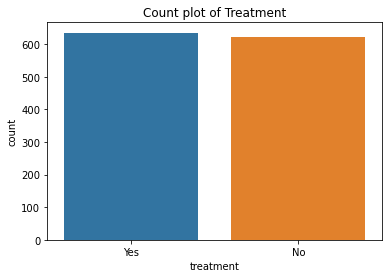

In [30]:
# count plot
sns.countplot(x='treatment', data = dataset)
plt.title("Count plot of Treatment")

### Interpretation
    From above plot we see that data is balanced.

Text(0.5, 1.0, 'Distribution of self employed v/s Treatment')

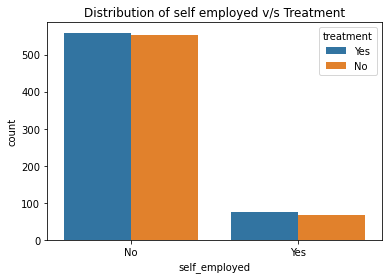

In [31]:
sns.countplot(x = 'self_employed', hue= 'treatment', data=dataset)
plt.title("Distribution of self employed v/s Treatment")

### Interpretation
    From above plot we see that count of not self employed is much higher than self employed.

Text(0.5, 1.0, 'Distribution of mental health consequence v/s Treatment')

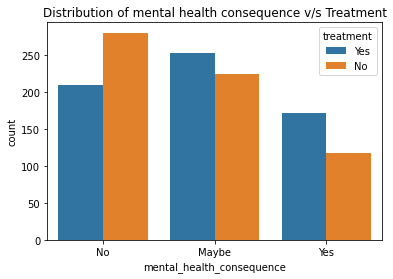

In [32]:
sns.countplot(x = 'mental_health_consequence', hue= 'treatment', data=dataset)
plt.title("Distribution of mental health consequence v/s Treatment")

Text(0.5, 1.0, 'Distribution of physical health consequence v/s Treatment')

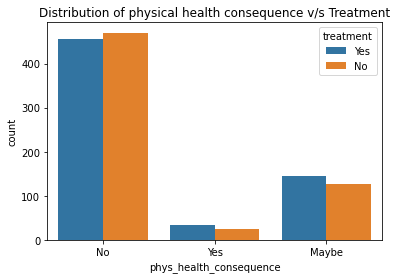

In [33]:
sns.countplot(x = 'phys_health_consequence', hue= 'treatment', data=dataset)
plt.title("Distribution of physical health consequence v/s Treatment")

Text(0.5, 1.0, 'Distribution of mental vs physical v/s Treatment')

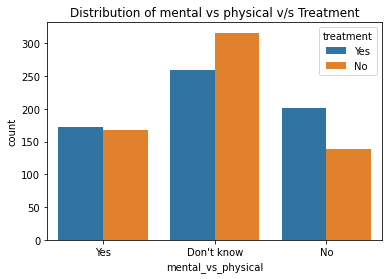

In [34]:
sns.countplot(x = 'mental_vs_physical', hue= 'treatment', data=dataset)
plt.title("Distribution of mental vs physical v/s Treatment")

Text(0.5, 1.0, 'Distribution of family history v/s Treatment')

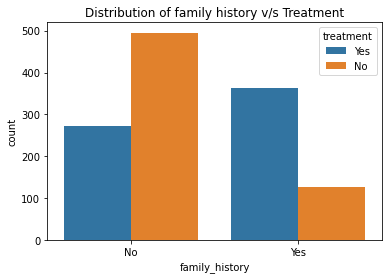

In [35]:
sns.countplot(x = 'family_history', hue= 'treatment', data=dataset)
plt.title("Distribution of family history v/s Treatment")

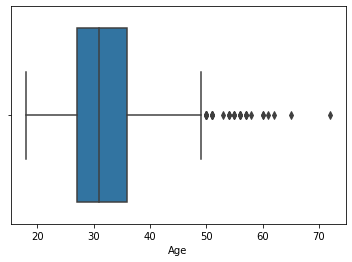

In [36]:
sns.boxplot(x = 'Age', data = dataset)

### Interpretation
    We see that above data has some outlier but we can't replace or remove it because it is important.

## Model Building

In [37]:
dataset2 = dataset.copy()
dataset2

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,female,United States,No,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,male,United States,No,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,male,Canada,No,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,male,United Kingdom,No,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,male,United States,No,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,male,United Kingdom,No,No,Yes,Don't know,26-100,No,Yes,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,32,male,United States,No,Yes,Yes,Often,26-100,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34,male,United States,No,Yes,Yes,Sometimes,More than 1000,No,Yes,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,46,female,United States,No,No,No,Don't know,100-500,Yes,Yes,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


In [38]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()

In [39]:
dataset2 = dataset2.apply(lab.fit_transform)

In [40]:
dataset2['target'] = dataset2['treatment']

In [41]:
dataset2.drop('treatment', axis = 1, inplace=True)

In [42]:
dataset2

,Age,Gender,Country,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,target
0,19,0,44,0,0,2,4,0,1,2,...,2,1,1,1,2,1,0,2,0,1
1,26,1,44,0,0,3,5,0,0,0,...,0,0,1,0,0,1,1,0,0,0
2,14,1,6,0,0,3,4,0,1,1,...,1,1,1,2,2,2,2,1,0,0
3,13,1,43,0,1,2,2,0,1,1,...,1,2,2,1,0,0,0,1,1,1
4,13,1,44,0,0,1,1,1,1,2,...,0,1,1,1,2,2,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,8,1,43,0,0,0,2,0,1,1,...,2,1,1,1,1,1,1,0,0,1
1255,14,1,44,0,1,2,2,1,1,2,...,1,1,1,1,2,1,1,2,0,1
1256,16,1,44,0,1,4,5,0,1,2,...,1,2,2,0,0,1,1,1,0,1
1257,28,0,44,0,0,0,1,1,1,1,...,0,2,1,0,0,1,1,1,0,0


In [43]:
feature = dataset2.iloc[:,:-1]

feature.head()

,Age,Gender,Country,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,19,0,44,0,0,2,4,0,1,2,...,2,2,1,1,1,2,1,0,2,0
1,26,1,44,0,0,3,5,0,0,0,...,0,0,0,1,0,0,1,1,0,0
2,14,1,6,0,0,3,4,0,1,1,...,0,1,1,1,2,2,2,2,1,0
3,13,1,43,0,1,2,2,0,1,1,...,1,1,2,2,1,0,0,0,1,1
4,13,1,44,0,0,1,1,1,1,2,...,0,0,1,1,1,2,2,2,0,0


In [44]:
target = dataset2.iloc[:,-1]

target.head()

0    1
1    0
2    0
3    1
4    0
Name: target, dtype: int32

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(feature, target, random_state = 101, test_size = 0.2)

In [46]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_roc_curve, plot_confusion_matrix, plot_precision_recall_curve

In [47]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier().fit(x_train, y_train)
pr = dt.predict(x_test)

cl = classification_report(y_test, pr)
print(cl)

              precision    recall  f1-score   support

           0       0.64      0.73      0.68       112
           1       0.76      0.66      0.71       140

    accuracy                           0.69       252
   macro avg       0.70      0.70      0.69       252
weighted avg       0.70      0.69      0.70       252



In [48]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(x_train, y_train)
pred = lr.predict(x_test)

cl = classification_report(y_test, pr)
print(cl)

              precision    recall  f1-score   support

           0       0.64      0.73      0.68       112
           1       0.76      0.66      0.71       140

    accuracy                           0.69       252
   macro avg       0.70      0.70      0.69       252
weighted avg       0.70      0.69      0.70       252



In [49]:
from sklearn.svm import SVC
svc = SVC().fit(x_train, y_train)
pr = svc.predict(x_test)

cl = classification_report(y_test, pr)
print(cl)

              precision    recall  f1-score   support

           0       0.78      0.73      0.76       112
           1       0.80      0.84      0.82       140

    accuracy                           0.79       252
   macro avg       0.79      0.78      0.79       252
weighted avg       0.79      0.79      0.79       252



In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier().fit(x_train, y_train)
pr = dt.predict(x_test)
cl = classification_report(y_test, pr)
print(cl)

              precision    recall  f1-score   support

           0       0.64      0.73      0.68       112
           1       0.76      0.66      0.71       140

    accuracy                           0.69       252
   macro avg       0.70      0.70      0.69       252
weighted avg       0.70      0.69      0.70       252



In [51]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB().fit(x_train, y_train)
pr = nb.predict(x_test)
cl = classification_report(y_test, pr)
print(cl)

              precision    recall  f1-score   support

           0       0.73      0.77      0.75       112
           1       0.81      0.77      0.79       140

    accuracy                           0.77       252
   macro avg       0.77      0.77      0.77       252
weighted avg       0.77      0.77      0.77       252



In [52]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier().fit(x_train, y_train)
pr = rf.predict(x_test)
cl = classification_report(y_test, pr)
print(cl)

              precision    recall  f1-score   support

           0       0.81      0.73      0.77       112
           1       0.80      0.86      0.83       140

    accuracy                           0.81       252
   macro avg       0.81      0.80      0.80       252
weighted avg       0.81      0.81      0.80       252



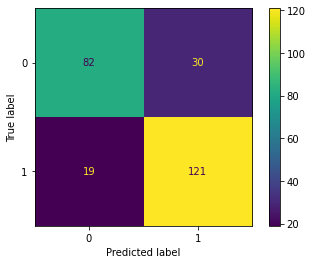

In [53]:
plot_confusion_matrix(rf,x_test, y_test)

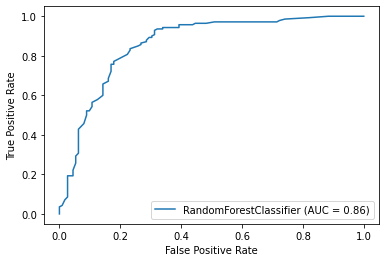

In [54]:
plot_roc_curve(rf, x_test, y_test)

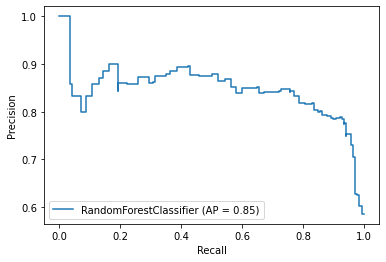

In [55]:
plot_precision_recall_curve(rf, x_test, y_test)

In [56]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier().fit(x_train, y_train)
pr = nn.predict(x_test)
cl = classification_report(y_test, pr)
print(cl)

              precision    recall  f1-score   support

           0       0.73      0.81      0.77       112
           1       0.83      0.76      0.79       140

    accuracy                           0.78       252
   macro avg       0.78      0.78      0.78       252
weighted avg       0.79      0.78      0.78       252



In [58]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
ld = LinearDiscriminantAnalysis().fit(x_train, y_train)
pr = ld.predict(x_test)
cl = classification_report(y_test, pr)
print(cl)

              precision    recall  f1-score   support

           0       0.77      0.73      0.75       112
           1       0.79      0.82      0.81       140

    accuracy                           0.78       252
   macro avg       0.78      0.78      0.78       252
weighted avg       0.78      0.78      0.78       252



In [59]:
from xgboost import XGBClassifier
xgb = XGBClassifier().fit(x_train, y_train)
pr = xgb.predict(x_test)
cl = classification_report(y_test, pr)
print(cl)

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       112
           1       0.81      0.80      0.81       140

    accuracy                           0.79       252
   macro avg       0.78      0.78      0.78       252
weighted avg       0.79      0.79      0.79       252



In [60]:
from xgboost import XGBRFClassifier
xgbr = XGBRFClassifier().fit(x_train, y_train)
pr = xgbr.predict(x_test)
cl = classification_report(y_test, pr)
print(cl)

              precision    recall  f1-score   support

           0       0.80      0.72      0.76       112
           1       0.79      0.86      0.82       140

    accuracy                           0.80       252
   macro avg       0.80      0.79      0.79       252
weighted avg       0.80      0.80      0.80       252



In [61]:
from catboost import CatBoostClassifier

cb = CatBoostClassifier(learning_rate=0.3).fit(x_train, y_train)
pr = cb.predict(x_test)


0:	learn: 0.5144638	total: 302ms	remaining: 5m 2s
1:	learn: 0.4296470	total: 308ms	remaining: 2m 33s
2:	learn: 0.3879967	total: 315ms	remaining: 1m 44s
3:	learn: 0.3609266	total: 322ms	remaining: 1m 20s
4:	learn: 0.3427602	total: 328ms	remaining: 1m 5s
5:	learn: 0.3225316	total: 335ms	remaining: 55.4s
6:	learn: 0.3099113	total: 341ms	remaining: 48.3s
7:	learn: 0.3030793	total: 346ms	remaining: 42.9s
8:	learn: 0.2913042	total: 349ms	remaining: 38.4s
9:	learn: 0.2847801	total: 352ms	remaining: 34.8s
10:	learn: 0.2820472	total: 355ms	remaining: 31.9s
11:	learn: 0.2752113	total: 358ms	remaining: 29.5s
12:	learn: 0.2675292	total: 361ms	remaining: 27.4s
13:	learn: 0.2565200	total: 364ms	remaining: 25.6s
14:	learn: 0.2525992	total: 367ms	remaining: 24.1s
15:	learn: 0.2474019	total: 369ms	remaining: 22.7s
16:	learn: 0.2401056	total: 372ms	remaining: 21.5s
17:	learn: 0.2362230	total: 375ms	remaining: 20.5s
18:	learn: 0.2279735	total: 378ms	remaining: 19.5s
19:	learn: 0.2207814	total: 381ms	rema

182:	learn: 0.0113010	total: 950ms	remaining: 4.24s
183:	learn: 0.0112294	total: 953ms	remaining: 4.23s
184:	learn: 0.0111304	total: 956ms	remaining: 4.21s
185:	learn: 0.0110189	total: 959ms	remaining: 4.2s
186:	learn: 0.0108954	total: 961ms	remaining: 4.18s
187:	learn: 0.0107831	total: 965ms	remaining: 4.17s
188:	learn: 0.0107541	total: 968ms	remaining: 4.15s
189:	learn: 0.0106580	total: 972ms	remaining: 4.14s
190:	learn: 0.0105777	total: 975ms	remaining: 4.13s
191:	learn: 0.0105116	total: 978ms	remaining: 4.12s
192:	learn: 0.0104592	total: 982ms	remaining: 4.11s
193:	learn: 0.0103421	total: 985ms	remaining: 4.09s
194:	learn: 0.0101967	total: 989ms	remaining: 4.08s
195:	learn: 0.0101594	total: 993ms	remaining: 4.08s
196:	learn: 0.0100830	total: 997ms	remaining: 4.06s
197:	learn: 0.0099812	total: 1s	remaining: 4.05s
198:	learn: 0.0098829	total: 1s	remaining: 4.04s
199:	learn: 0.0097336	total: 1.01s	remaining: 4.03s
200:	learn: 0.0096403	total: 1.01s	remaining: 4.01s
201:	learn: 0.00951

375:	learn: 0.0043033	total: 1.58s	remaining: 2.63s
376:	learn: 0.0043033	total: 1.59s	remaining: 2.62s
377:	learn: 0.0042969	total: 1.59s	remaining: 2.62s
378:	learn: 0.0042874	total: 1.59s	remaining: 2.61s
379:	learn: 0.0042870	total: 1.59s	remaining: 2.6s
380:	learn: 0.0042869	total: 1.6s	remaining: 2.6s
381:	learn: 0.0042868	total: 1.6s	remaining: 2.59s
382:	learn: 0.0042866	total: 1.6s	remaining: 2.58s
383:	learn: 0.0042866	total: 1.61s	remaining: 2.58s
384:	learn: 0.0042866	total: 1.61s	remaining: 2.57s
385:	learn: 0.0042865	total: 1.61s	remaining: 2.56s
386:	learn: 0.0042865	total: 1.61s	remaining: 2.56s
387:	learn: 0.0042865	total: 1.62s	remaining: 2.55s
388:	learn: 0.0042865	total: 1.62s	remaining: 2.54s
389:	learn: 0.0042786	total: 1.62s	remaining: 2.54s
390:	learn: 0.0042783	total: 1.63s	remaining: 2.53s
391:	learn: 0.0042695	total: 1.63s	remaining: 2.53s
392:	learn: 0.0042695	total: 1.63s	remaining: 2.52s
393:	learn: 0.0042695	total: 1.64s	remaining: 2.52s
394:	learn: 0.004

549:	learn: 0.0040937	total: 2.05s	remaining: 1.68s
550:	learn: 0.0040936	total: 2.05s	remaining: 1.67s
551:	learn: 0.0040936	total: 2.06s	remaining: 1.67s
552:	learn: 0.0040905	total: 2.06s	remaining: 1.66s
553:	learn: 0.0040883	total: 2.06s	remaining: 1.66s
554:	learn: 0.0040883	total: 2.06s	remaining: 1.65s
555:	learn: 0.0040882	total: 2.07s	remaining: 1.65s
556:	learn: 0.0040882	total: 2.07s	remaining: 1.65s
557:	learn: 0.0040880	total: 2.07s	remaining: 1.64s
558:	learn: 0.0040879	total: 2.08s	remaining: 1.64s
559:	learn: 0.0040770	total: 2.08s	remaining: 1.63s
560:	learn: 0.0040653	total: 2.08s	remaining: 1.63s
561:	learn: 0.0040653	total: 2.08s	remaining: 1.62s
562:	learn: 0.0040653	total: 2.09s	remaining: 1.62s
563:	learn: 0.0040652	total: 2.09s	remaining: 1.61s
564:	learn: 0.0040652	total: 2.09s	remaining: 1.61s
565:	learn: 0.0040652	total: 2.1s	remaining: 1.61s
566:	learn: 0.0040652	total: 2.1s	remaining: 1.6s
567:	learn: 0.0040491	total: 2.1s	remaining: 1.6s
568:	learn: 0.004

751:	learn: 0.0038821	total: 2.69s	remaining: 886ms
752:	learn: 0.0038820	total: 2.69s	remaining: 882ms
753:	learn: 0.0038820	total: 2.69s	remaining: 879ms
754:	learn: 0.0038820	total: 2.7s	remaining: 875ms
755:	learn: 0.0038820	total: 2.7s	remaining: 871ms
756:	learn: 0.0038819	total: 2.7s	remaining: 868ms
757:	learn: 0.0038819	total: 2.71s	remaining: 864ms
758:	learn: 0.0038819	total: 2.71s	remaining: 861ms
759:	learn: 0.0038819	total: 2.71s	remaining: 857ms
760:	learn: 0.0038819	total: 2.72s	remaining: 853ms
761:	learn: 0.0038819	total: 2.72s	remaining: 849ms
762:	learn: 0.0038818	total: 2.72s	remaining: 846ms
763:	learn: 0.0038818	total: 2.73s	remaining: 842ms
764:	learn: 0.0038816	total: 2.73s	remaining: 839ms
765:	learn: 0.0038816	total: 2.73s	remaining: 835ms
766:	learn: 0.0038737	total: 2.74s	remaining: 831ms
767:	learn: 0.0038737	total: 2.74s	remaining: 828ms
768:	learn: 0.0038735	total: 2.74s	remaining: 824ms
769:	learn: 0.0038735	total: 2.75s	remaining: 820ms
770:	learn: 0.0

946:	learn: 0.0037286	total: 3.3s	remaining: 185ms
947:	learn: 0.0037286	total: 3.31s	remaining: 181ms
948:	learn: 0.0037281	total: 3.31s	remaining: 178ms
949:	learn: 0.0037281	total: 3.31s	remaining: 174ms
950:	learn: 0.0037281	total: 3.32s	remaining: 171ms
951:	learn: 0.0037277	total: 3.33s	remaining: 168ms
952:	learn: 0.0037274	total: 3.33s	remaining: 164ms
953:	learn: 0.0037273	total: 3.33s	remaining: 161ms
954:	learn: 0.0037271	total: 3.34s	remaining: 157ms
955:	learn: 0.0037271	total: 3.34s	remaining: 154ms
956:	learn: 0.0037269	total: 3.34s	remaining: 150ms
957:	learn: 0.0037268	total: 3.35s	remaining: 147ms
958:	learn: 0.0037268	total: 3.35s	remaining: 143ms
959:	learn: 0.0037266	total: 3.35s	remaining: 140ms
960:	learn: 0.0037266	total: 3.36s	remaining: 136ms
961:	learn: 0.0037266	total: 3.36s	remaining: 133ms
962:	learn: 0.0037266	total: 3.36s	remaining: 129ms
963:	learn: 0.0037266	total: 3.37s	remaining: 126ms
964:	learn: 0.0037266	total: 3.37s	remaining: 122ms
965:	learn: 0

In [62]:
cl = classification_report(y_test, pr)
print(cl)

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       112
           1       0.84      0.84      0.84       140

    accuracy                           0.82       252
   macro avg       0.82      0.82      0.82       252
weighted avg       0.82      0.82      0.82       252



### Interpretation
    Here Accuracy is 0.82 which is better than any other classifier.

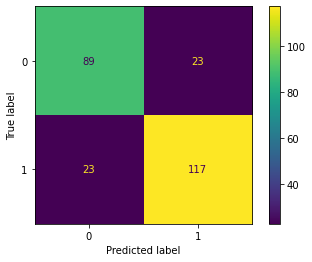

In [63]:
plot_confusion_matrix(cb,x_test, y_test)

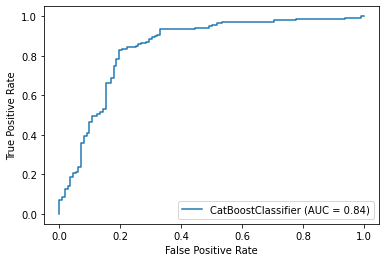

In [64]:
plot_roc_curve(cb, x_test, y_test)

### Interpretation
    Here AUC for Catboost is 0.84 which is better than any other classifier.

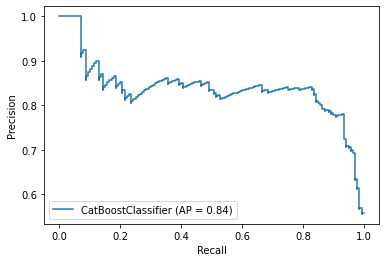

In [65]:
plot_precision_recall_curve(cb, x_test, y_test)

### Interpretation
    Here Average Precision is 0.84 which is better than any other classifier.

## Feature Importance

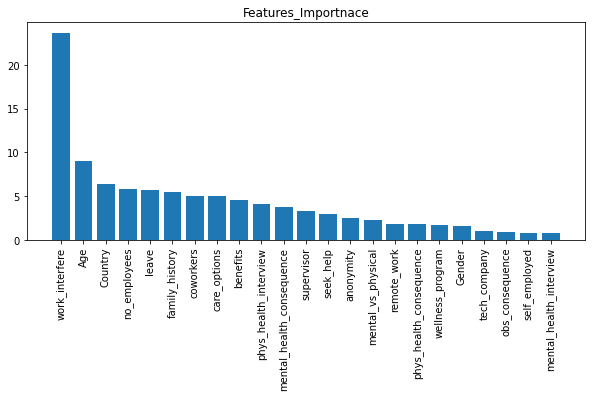

In [67]:
feature_importance = cb.feature_importances_    # Important Features

indices=np.argsort(feature_importance)[::-1]    # Reature importance in descending order
names=[dataset2.columns[:-1][i] for i in indices ]     # Rearrange names


plt.figure(figsize=(10,4))    # Set Figure Size
plt.title("Features_Importnace")    # Add title
plt.bar(range(23), feature_importance[indices])    # Create Barplot
plt.xticks(range(23),names,rotation=90)    # Xticks for each Bar
plt.show()

In [68]:
imp_features = names[:12]
imp_features

['work_interfere',
 'Age',
 'Country',
 'no_employees',
 'leave',
 'family_history',
 'coworkers',
 'care_options',
 'benefits',
 'phys_health_interview',
 'mental_health_consequence',
 'supervisor']

In [76]:
new_data = dataset2[imp_features]
new_data['Target'] = dataset2['target']
new_data.head()

,work_interfere,Age,Country,no_employees,leave,family_history,coworkers,care_options,benefits,phys_health_interview,mental_health_consequence,supervisor,Target
0,2,19,44,4,2,0,1,1,2,0,1,2,1
1,3,26,44,5,0,0,0,0,0,1,0,0,0
2,3,14,6,4,1,0,2,0,1,2,1,2,0
3,2,13,43,2,1,1,1,2,1,0,2,0,1
4,1,13,44,1,0,0,1,0,2,2,1,2,0


In [77]:
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(new_data.iloc[:,:-1], new_data.iloc[:,-1], test_size = .20, random_state = 7)    # Split dataset into train, test


In [79]:
cb_new = CatBoostClassifier(learning_rate=0.2).fit(x_train_new, y_train_new)
pr_new = cb_new.predict(x_test_new)

0:	learn: 0.5613403	total: 2.84ms	remaining: 2.84s
1:	learn: 0.4910469	total: 5.42ms	remaining: 2.7s
2:	learn: 0.4449289	total: 8.91ms	remaining: 2.96s
3:	learn: 0.4117223	total: 12.6ms	remaining: 3.14s
4:	learn: 0.3897986	total: 15.5ms	remaining: 3.09s
5:	learn: 0.3762240	total: 18.2ms	remaining: 3.01s
6:	learn: 0.3658129	total: 20.8ms	remaining: 2.95s
7:	learn: 0.3558133	total: 23.4ms	remaining: 2.91s
8:	learn: 0.3451073	total: 26.1ms	remaining: 2.88s
9:	learn: 0.3371271	total: 32ms	remaining: 3.17s
10:	learn: 0.3304299	total: 46.8ms	remaining: 4.21s
11:	learn: 0.3276170	total: 49.5ms	remaining: 4.08s
12:	learn: 0.3174973	total: 52.2ms	remaining: 3.96s
13:	learn: 0.3112640	total: 54.9ms	remaining: 3.87s
14:	learn: 0.3054466	total: 57.9ms	remaining: 3.8s
15:	learn: 0.2981411	total: 60.7ms	remaining: 3.73s
16:	learn: 0.2909247	total: 63.5ms	remaining: 3.67s
17:	learn: 0.2863394	total: 66ms	remaining: 3.6s
18:	learn: 0.2806347	total: 68.6ms	remaining: 3.54s
19:	learn: 0.2747400	total: 7

172:	learn: 0.0418473	total: 496ms	remaining: 2.37s
173:	learn: 0.0411545	total: 499ms	remaining: 2.37s
174:	learn: 0.0407773	total: 502ms	remaining: 2.37s
175:	learn: 0.0403568	total: 504ms	remaining: 2.36s
176:	learn: 0.0401231	total: 507ms	remaining: 2.36s
177:	learn: 0.0395818	total: 512ms	remaining: 2.36s
178:	learn: 0.0392508	total: 515ms	remaining: 2.36s
179:	learn: 0.0391582	total: 518ms	remaining: 2.36s
180:	learn: 0.0391560	total: 520ms	remaining: 2.35s
181:	learn: 0.0390959	total: 524ms	remaining: 2.35s
182:	learn: 0.0387402	total: 527ms	remaining: 2.35s
183:	learn: 0.0387058	total: 530ms	remaining: 2.35s
184:	learn: 0.0386783	total: 532ms	remaining: 2.35s
185:	learn: 0.0382073	total: 536ms	remaining: 2.34s
186:	learn: 0.0382051	total: 538ms	remaining: 2.34s
187:	learn: 0.0381101	total: 541ms	remaining: 2.33s
188:	learn: 0.0381000	total: 543ms	remaining: 2.33s
189:	learn: 0.0380905	total: 545ms	remaining: 2.32s
190:	learn: 0.0376127	total: 547ms	remaining: 2.32s
191:	learn: 

350:	learn: 0.0171011	total: 970ms	remaining: 1.79s
351:	learn: 0.0171011	total: 973ms	remaining: 1.79s
352:	learn: 0.0171005	total: 975ms	remaining: 1.79s
353:	learn: 0.0170941	total: 978ms	remaining: 1.78s
354:	learn: 0.0170745	total: 981ms	remaining: 1.78s
355:	learn: 0.0170406	total: 983ms	remaining: 1.78s
356:	learn: 0.0170405	total: 985ms	remaining: 1.77s
357:	learn: 0.0170405	total: 988ms	remaining: 1.77s
358:	learn: 0.0170405	total: 989ms	remaining: 1.77s
359:	learn: 0.0170404	total: 991ms	remaining: 1.76s
360:	learn: 0.0170404	total: 993ms	remaining: 1.76s
361:	learn: 0.0170404	total: 995ms	remaining: 1.75s
362:	learn: 0.0170403	total: 998ms	remaining: 1.75s
363:	learn: 0.0170151	total: 1s	remaining: 1.75s
364:	learn: 0.0170151	total: 1s	remaining: 1.75s
365:	learn: 0.0170151	total: 1s	remaining: 1.74s
366:	learn: 0.0170151	total: 1.01s	remaining: 1.74s
367:	learn: 0.0170151	total: 1.01s	remaining: 1.74s
368:	learn: 0.0170151	total: 1.01s	remaining: 1.73s
369:	learn: 0.0170150

529:	learn: 0.0135027	total: 1.42s	remaining: 1.26s
530:	learn: 0.0134532	total: 1.43s	remaining: 1.26s
531:	learn: 0.0133997	total: 1.43s	remaining: 1.26s
532:	learn: 0.0133144	total: 1.43s	remaining: 1.25s
533:	learn: 0.0133144	total: 1.43s	remaining: 1.25s
534:	learn: 0.0132172	total: 1.44s	remaining: 1.25s
535:	learn: 0.0131923	total: 1.44s	remaining: 1.25s
536:	learn: 0.0130991	total: 1.44s	remaining: 1.24s
537:	learn: 0.0130071	total: 1.45s	remaining: 1.24s
538:	learn: 0.0130071	total: 1.45s	remaining: 1.24s
539:	learn: 0.0129759	total: 1.45s	remaining: 1.24s
540:	learn: 0.0129381	total: 1.45s	remaining: 1.23s
541:	learn: 0.0128938	total: 1.46s	remaining: 1.23s
542:	learn: 0.0128270	total: 1.46s	remaining: 1.23s
543:	learn: 0.0127757	total: 1.46s	remaining: 1.23s
544:	learn: 0.0127047	total: 1.47s	remaining: 1.22s
545:	learn: 0.0126545	total: 1.47s	remaining: 1.22s
546:	learn: 0.0126544	total: 1.47s	remaining: 1.22s
547:	learn: 0.0126543	total: 1.47s	remaining: 1.22s
548:	learn: 

725:	learn: 0.0120056	total: 1.9s	remaining: 716ms
726:	learn: 0.0120056	total: 1.9s	remaining: 713ms
727:	learn: 0.0120056	total: 1.9s	remaining: 711ms
728:	learn: 0.0120056	total: 1.9s	remaining: 708ms
729:	learn: 0.0120055	total: 1.91s	remaining: 705ms
730:	learn: 0.0120055	total: 1.91s	remaining: 702ms
731:	learn: 0.0120055	total: 1.91s	remaining: 700ms
732:	learn: 0.0120055	total: 1.91s	remaining: 697ms
733:	learn: 0.0120055	total: 1.92s	remaining: 695ms
734:	learn: 0.0120055	total: 1.92s	remaining: 692ms
735:	learn: 0.0120055	total: 1.92s	remaining: 689ms
736:	learn: 0.0120055	total: 1.92s	remaining: 686ms
737:	learn: 0.0120054	total: 1.92s	remaining: 683ms
738:	learn: 0.0120054	total: 1.93s	remaining: 681ms
739:	learn: 0.0120054	total: 1.93s	remaining: 678ms
740:	learn: 0.0120053	total: 1.93s	remaining: 676ms
741:	learn: 0.0120053	total: 1.94s	remaining: 673ms
742:	learn: 0.0120053	total: 1.94s	remaining: 670ms
743:	learn: 0.0120053	total: 1.94s	remaining: 667ms
744:	learn: 0.01

921:	learn: 0.0111336	total: 2.36s	remaining: 199ms
922:	learn: 0.0111336	total: 2.36s	remaining: 197ms
923:	learn: 0.0111336	total: 2.37s	remaining: 195ms
924:	learn: 0.0111336	total: 2.37s	remaining: 192ms
925:	learn: 0.0111335	total: 2.37s	remaining: 190ms
926:	learn: 0.0111335	total: 2.38s	remaining: 187ms
927:	learn: 0.0111335	total: 2.38s	remaining: 184ms
928:	learn: 0.0111335	total: 2.38s	remaining: 182ms
929:	learn: 0.0111335	total: 2.38s	remaining: 179ms
930:	learn: 0.0111335	total: 2.39s	remaining: 177ms
931:	learn: 0.0111335	total: 2.39s	remaining: 174ms
932:	learn: 0.0111334	total: 2.39s	remaining: 172ms
933:	learn: 0.0111334	total: 2.4s	remaining: 169ms
934:	learn: 0.0111328	total: 2.4s	remaining: 167ms
935:	learn: 0.0111328	total: 2.4s	remaining: 164ms
936:	learn: 0.0111328	total: 2.4s	remaining: 162ms
937:	learn: 0.0111328	total: 2.41s	remaining: 159ms
938:	learn: 0.0111324	total: 2.41s	remaining: 156ms
939:	learn: 0.0111324	total: 2.41s	remaining: 154ms
940:	learn: 0.01

In [80]:
cl = classification_report(y_test_new, pr_new)
print(cl)

              precision    recall  f1-score   support

           0       0.85      0.79      0.82       120
           1       0.82      0.87      0.85       132

    accuracy                           0.83       252
   macro avg       0.83      0.83      0.83       252
weighted avg       0.83      0.83      0.83       252



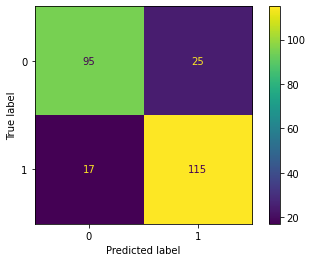

In [81]:
plot_confusion_matrix(cb_new,x_test_new, y_test_new)

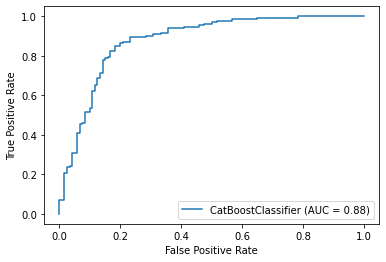

In [82]:
plot_roc_curve(cb_new, x_test_new, y_test_new)

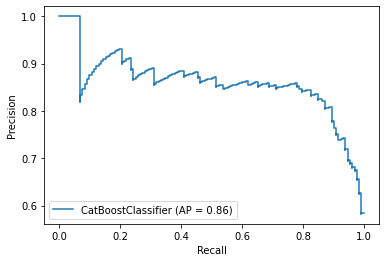

In [83]:
plot_precision_recall_curve(cb_new, x_test_new, y_test_new)

## Save Model

In [84]:
import joblib

In [85]:
joblib.dump(cb_new, 'Catboost_new.pkl')    # save model

['Catboost_new.pkl']

## Advantages
1. If we have data of particular volunteer then we can predict He/She would addicted or Not with Accuracy 82%.

## Disadvantages
1. Two column of the dataset has lots of missing value, So I thought this is main reason for getting some incorrect prediction.

## Conclusion
1. Count of Treatment variable i.e target variable is nearly equal so the data is balanced.
2. We see that count of not self employed is much higher than self employed.
3. Accuracy of Catboost model is 0.82 which is better than any other classifier.
4. AUC for Catboost model is 0.88 which is also better than any other classifier.
5. Average Precision is 0.86 which is better than any other classifier.
6. Overall Catboost model is best fit for given dataset.